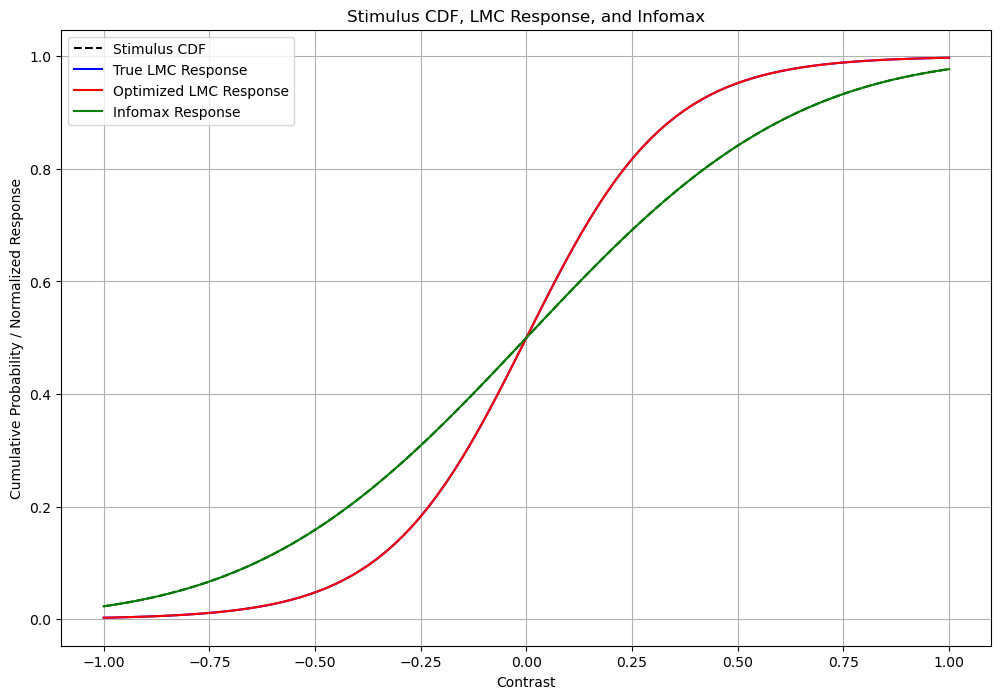

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm

# Step 1: Generate synthetic data for stimulus (x) and its CDF
np.random.seed(42)
x = np.linspace(-1, 1, 100)  # Stimulus values
stimulus_cdf = norm.cdf(x, loc=0, scale=0.5)  # Stimulus CDF based on Gaussian distribution

# Step 2: Define a true nonlinearity that represents LMC response
# This is typically a nonlinear function of the stimulus
def true_nonlinearity(x):
    return 0.5 * (1 + np.tanh(3 * x))  # Shifted and scaled tanh for LMC response

lmc_response = true_nonlinearity(x)  # Simulated LMC response

# Step 3: Define the loss function for Bayesian Efficient Coding (MSE-based)
def loss_function(params, x, y, p):
    g_x = 0.5 * (1 + np.tanh(params[0] * x + params[1]))  # Parametric form of nonlinearity
    y_hat = g_x
    return np.sum(np.abs(y - y_hat) ** p)

# Step 4: Optimize the nonlinearity parameter using a specific loss function
p = 2  # Using mean squared error (MSE)
result = minimize(loss_function, x0=[3, 0], args=(x, lmc_response, p), method='Nelder-Mead')
optimized_params = result.x

# Generate the optimized LMC response
optimized_response = 0.5 * (1 + np.tanh(optimized_params[0] * x + optimized_params[1]))

# Step 5: Compute the Infomax response (maximize mutual information)
# Infomax is often approximated by matching the stimulus CDF to response CDF
infomax_response = stimulus_cdf

# Step 6: Plot the Stimulus CDF, True LMC Response, Optimized Response, and Infomax Response
plt.figure(figsize=(12, 8))

# Plot the stimulus CDF
plt.plot(x, stimulus_cdf, label="Stimulus CDF", color='black', linestyle='--')

# Plot the true LMC response
plt.plot(x, lmc_response, label="True LMC Response", color='blue', linestyle='-')

# Plot the optimized LMC response from BEC
plt.plot(x, optimized_response, label="Optimized LMC Response", color='red', linestyle='-')

# Plot the Infomax response
plt.plot(x, infomax_response, label="Infomax Response", color='green', linestyle='-')

plt.xlabel("Contrast")
plt.ylabel("Cumulative Probability / Normalized Response")
plt.title("Stimulus CDF, LMC Response, and Infomax")
plt.legend()
plt.grid(True)
plt.show()


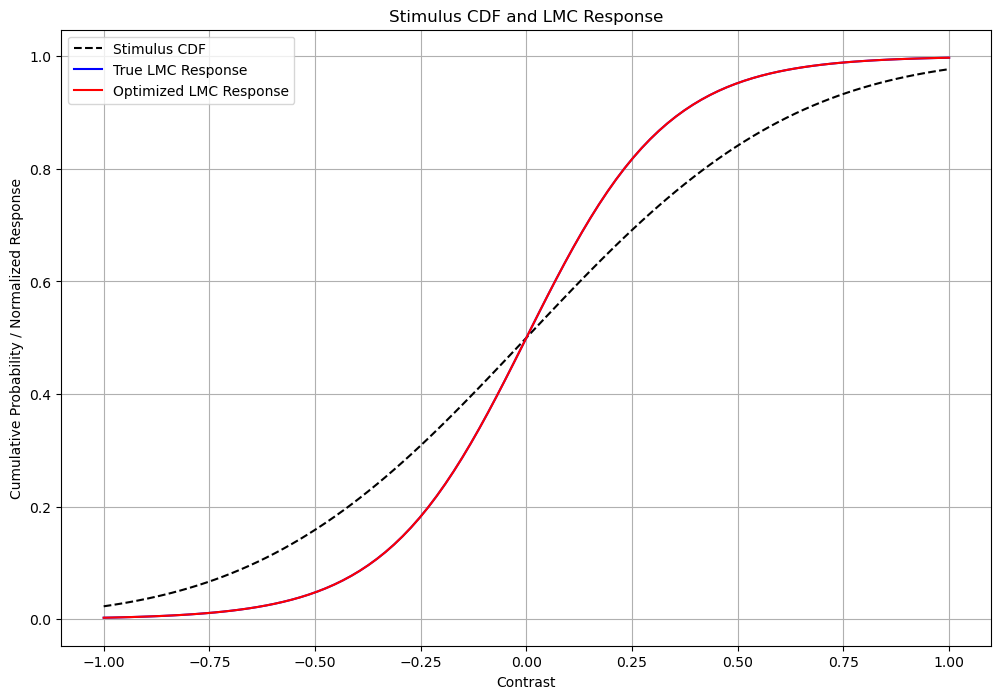

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm

# Step 1: Generate synthetic data for stimulus (x) and its CDF
np.random.seed(42)
x = np.linspace(-1, 1, 100)  # Stimulus values
stimulus_cdf = norm.cdf(x, loc=0, scale=0.5)  # Stimulus CDF based on Gaussian distribution

# Step 2: Define a true nonlinearity that represents LMC response
# This is typically a nonlinear function of the stimulus
def true_nonlinearity(x):
    return 0.5 * (1 + np.tanh(3 * x))  # Shifted and scaled tanh for LMC response

lmc_response = true_nonlinearity(x)  # Simulated LMC response

# Step 3: Define the loss function for Bayesian Efficient Coding
def loss_function(params, x, y, p):
    g_x = 0.5 * (1 + np.tanh(params[0] * x + params[1]))  # Parametric form of nonlinearity
    y_hat = g_x
    return np.sum(np.abs(y - y_hat) ** p)

# Step 4: Optimize the nonlinearity parameter using a specific loss function
p = 2  # Using mean squared error (MSE)
result = minimize(loss_function, x0=[3, 0], args=(x, lmc_response, p), method='Nelder-Mead')
optimized_params = result.x

# Generate the optimized LMC response
optimized_response = 0.5 * (1 + np.tanh(optimized_params[0] * x + optimized_params[1]))

# Step 5: Plot the Stimulus CDF and LMC Response
plt.figure(figsize=(12, 8))

# Plot the stimulus CDF
plt.plot(x, stimulus_cdf, label="Stimulus CDF", color='black', linestyle='--')

# Plot the true LMC response
plt.plot(x, lmc_response, label="True LMC Response", color='blue', linestyle='-')

# Plot the optimized LMC response from BEC
plt.plot(x, optimized_response, label="Optimized LMC Response", color='red', linestyle='-')

plt.xlabel("Contrast")
plt.ylabel("Cumulative Probability / Normalized Response")
plt.title("Stimulus CDF and LMC Response")
plt.legend()
plt.grid(True)
plt.show()


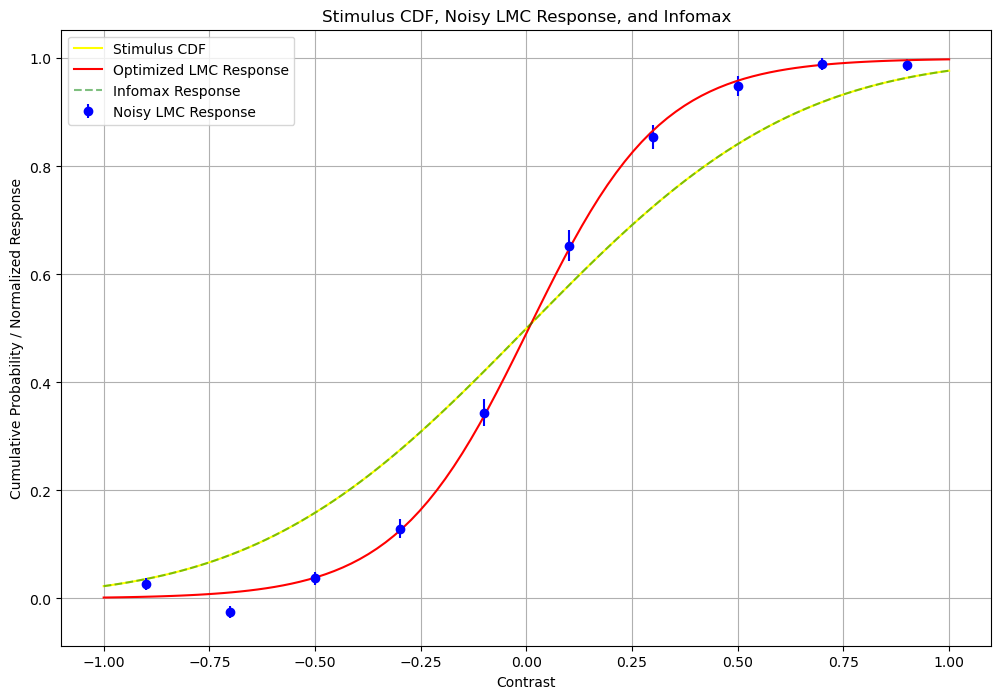

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm

# Step 1: Generate synthetic data for stimulus (x) and its CDF
np.random.seed(42)
x = np.linspace(-1, 1, 100)  # Stimulus values
stimulus_cdf = norm.cdf(x, loc=0, scale=0.5)  # Stimulus CDF based on Gaussian distribution

# Step 2: Define a true nonlinearity that represents LMC response with added noise
def true_nonlinearity(x):
    return 0.5 * (1 + np.tanh(3 * x))  # Shifted and scaled tanh for LMC response

# Add Gaussian noise to the LMC response
noise_level = 0.05  # Noise level (standard deviation)
lmc_response = true_nonlinearity(x) + np.random.normal(0, noise_level, size=x.shape)

# Step 3: Compute mean and error bars for LMC response in 10 intervals
intervals = np.linspace(-1, 1, 11)
means = []
errors = []
interval_centers = []

for i in range(len(intervals) - 1):
    idx = (x >= intervals[i]) & (x < intervals[i + 1])
    mean_value = np.mean(lmc_response[idx])
    error_value = np.std(lmc_response[idx]) / np.sqrt(np.sum(idx))
    means.append(mean_value)
    errors.append(error_value)
    interval_centers.append((intervals[i] + intervals[i + 1]) / 2)

# Step 4: Define the loss function for Bayesian Efficient Coding (MSE-based)
def loss_function(params, x, y, p):
    g_x = 0.5 * (1 + np.tanh(params[0] * x + params[1]))  # Parametric form of nonlinearity
    y_hat = g_x
    return np.sum(np.abs(y - y_hat) ** p)

# Step 5: Optimize the nonlinearity parameter using a specific loss function
p = 2  # Using mean squared error (MSE)
result = minimize(loss_function, x0=[3, 0], args=(x, lmc_response, p), method='Nelder-Mead')
optimized_params = result.x

# Generate the optimized LMC response
optimized_response = 0.5 * (1 + np.tanh(optimized_params[0] * x + optimized_params[1]))

# Step 6: Compute the Infomax response (maximize mutual information)
# Infomax is often approximated by matching the stimulus CDF to response CDF
infomax_response = stimulus_cdf

# Step 7: Plot the Stimulus CDF, True LMC Response with Error Bars, Optimized Response, and Infomax Response
plt.figure(figsize=(12, 8))

# Plot the stimulus CDF as a solid line
plt.plot(x, stimulus_cdf, label="Stimulus CDF", color='yellow', linestyle='-')

# Plot the noisy LMC response as points with error bars
plt.errorbar(interval_centers, means, yerr=errors, fmt='o', color='blue', label="Noisy LMC Response")

# Plot the optimized LMC response from BEC
plt.plot(x, optimized_response, label="Optimized LMC Response", color='red', linestyle='-')

# Plot the Infomax response as a transparent dashed gray line
plt.plot(x, infomax_response, label="Infomax Response", color='green', linestyle='--', alpha=0.5)

plt.xlabel("Contrast")
plt.ylabel("Cumulative Probability / Normalized Response")
plt.title("Stimulus CDF, Noisy LMC Response, and Infomax")
plt.legend()
plt.grid(True)
plt.show()
